Using tools column: Which AI tools do you currently use for professional or personal development? (select all that apply)


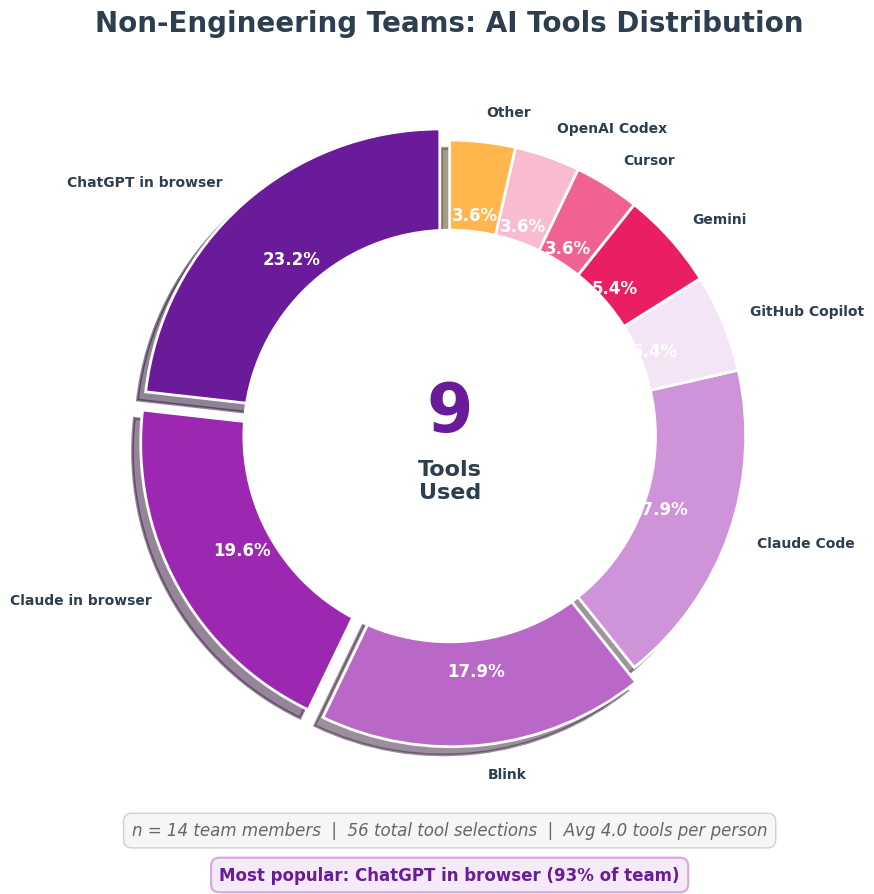


NON-ENGINEERING TEAMS - AI TOOLS USAGE

📊 Sample Size: 14 team members
   Total tool selections: 56
   Average tools per person: 4.0
   Unique tools used: 9

🛠️  Tool Usage Rankings:
Rank   Tool                                     Count    % of Team    % of Selections   
1      ChatGPT in browser                       13       92.9       % 23.2             %
2      Claude in browser                        11       78.6       % 19.6             %
3      Blink                                    10       71.4       % 17.9             %
4      Claude Code                              10       71.4       % 17.9             %
5      GitHub Copilot                           3        21.4       % 5.4              %
6      Gemini                                   3        21.4       % 5.4              %
7      Cursor                                   2        14.3       % 3.6              %
8      OpenAI Codex                             2        14.3       % 3.6              %
9      Other   

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Load the data
df = pd.read_csv('../../responses.csv')

# Filter to INCLUDE only non-engineering teams
teams_to_include = ['Customer Solutions', 'Customer Support', 'Pre-Sales']
df_filtered = df[df['Which team are you a part of?'].isin(teams_to_include)].copy()

# Get the tools column
tools_col = df_filtered.columns[13]  # Column N - AI tools

print(f"Using tools column: {tools_col}")

# Parse the multi-select responses (comma-separated values)
all_tools = []
for response in df_filtered[tools_col].dropna():
    # Split by comma and strip whitespace
    tools = [tool.strip() for tool in response.split(',')]
    all_tools.extend(tools)

# Count each tool
tool_counts = Counter(all_tools)

# Convert to sorted list by count
tools_data = sorted(tool_counts.items(), key=lambda x: x[1], reverse=True)
tool_names = [item[0] for item in tools_data]
tool_values = [item[1] for item in tools_data]

# Calculate totals
total_respondents = len(df_filtered)
total_selections = len(all_tools)

# Create figure
fig, ax = plt.subplots(figsize=(12, 9))

# Define modern, vibrant color palette (purple to pink gradient with additional colors)
base_colors = ['#6A1B9A', '#9C27B0', '#BA68C8', '#CE93D8', '#F3E5F5', 
               '#E91E63', '#F06292', '#F8BBD0', '#FFB74D', '#FFCC80']
# Use colors cyclically if we have more tools than colors
colors = [base_colors[i % len(base_colors)] for i in range(len(tool_names))]

# Create explode array for top 3 tools to make them stand out
explode_values = [0.05 if i < 3 else 0 for i in range(len(tool_names))]

# Create pie chart with improved styling
wedges, texts, autotexts = ax.pie(
    tool_values,
    labels=tool_names,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 11, 'weight': 'bold', 'color': '#2C3E50'},
    pctdistance=0.75,
    labeldistance=1.1,
    explode=explode_values,
    shadow=True,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

# Make percentage text more readable
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_weight('bold')

# Adjust label positions for better readability
for text in texts:
    text.set_fontsize(10)
    text.set_color('#2C3E50')

# Create donut hole
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add center text with key stat
most_popular_tool = tool_names[0]
most_popular_count = tool_values[0]
most_popular_pct = (most_popular_count / total_respondents) * 100

ax.text(0, 0.08, f'{len(tool_names)}', 
         ha='center', va='center',
         fontsize=48, weight='bold', color='#6A1B9A')
ax.text(0, -0.15, 'Tools\nUsed', 
         ha='center', va='center',
         fontsize=16, weight='bold', color='#2C3E50')

# Add title with improved styling
plt.title('Non-Engineering Teams: AI Tools Distribution', 
          fontsize=20, weight='bold', pad=25, color='#2C3E50')

# Add subtitle with context and improved styling
subtitle_text = f'n = {total_respondents} team members  |  {total_selections} total tool selections  |  Avg {total_selections/total_respondents:.1f} tools per person'
plt.text(0, -1.35, subtitle_text, 
         ha='center', fontsize=12, style='italic', color='#666666',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='#F5F5F5', edgecolor='#CCCCCC', linewidth=1, alpha=0.9))

# Add a note about the most popular tool with improved styling
note_text = f'Most popular: {most_popular_tool} ({most_popular_pct:.0f}% of team)'
plt.text(0, -1.50, note_text, 
         ha='center', fontsize=12, weight='bold', color='#6A1B9A',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='#F3E5F5', edgecolor='#CE93D8', linewidth=1.5, alpha=0.8))

plt.tight_layout()
plt.show()

# Print detailed summary
print("\n" + "="*80)
print("NON-ENGINEERING TEAMS - AI TOOLS USAGE")
print("="*80)

print(f"\n📊 Sample Size: {total_respondents} team members")
print(f"   Total tool selections: {total_selections}")
print(f"   Average tools per person: {total_selections/total_respondents:.1f}")
print(f"   Unique tools used: {len(tool_counts)}")

print(f"\n🛠️  Tool Usage Rankings:")
print(f"{'Rank':<6} {'Tool':<40} {'Count':<8} {'% of Team':<12} {'% of Selections':<18}")
print("="*80)

for i, (tool, count) in enumerate(tools_data, 1):
    pct_of_team = (count / total_respondents) * 100
    pct_of_selections = (count / total_selections) * 100
    print(f"{i:<6} {tool:<40} {count:<8} {pct_of_team:<11.1f}% {pct_of_selections:<17.1f}%")

print(f"\n✨ Key Insights:")

# Top 3 tools
print(f"   🏆 Top 3 Tools:")
for i, (tool, count) in enumerate(tools_data[:3], 1):
    pct = (count / total_respondents) * 100
    print(f"   {i}. {tool}: {count} users ({pct:.0f}% of team)")

# Tool diversity
if len(tool_counts) >= 5:
    print(f"\n   • High tool diversity: {len(tool_counts)} different tools in use")
    print(f"   • Team members are experimenting with multiple AI solutions")
elif len(tool_counts) >= 3:
    print(f"\n   • Moderate tool diversity: {len(tool_counts)} different tools in use")
else:
    print(f"\n   • Low tool diversity: Only {len(tool_counts)} tools in use")
    print(f"   • Team has converged on preferred tools")

# Compare most popular tool
print(f"\n   • Most popular tool ({most_popular_tool}) is used by {most_popular_pct:.0f}% of non-engineering team")

print("\n" + "="*80 + "\n")